In [1]:
import sklearn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

countyFiles = []
stateFiles = []
localActive = []
localTotal = []
localIncidence = []
localNew = []
stateActive = []
stateTotal = []
stateIncidence = []
stateNew = []
testRate = []
holiday = []
bars = []
beaches = []
saferAtHome = []
METier = []
masks = []
state2 = []
combinedData = []

DataColumns = {'Date', 'FL_Active', 'FL_new', 'FL_Incidence', 'Local_Active', 'Local_New', 'Local_Incidence', 'FL_SAH', 'Bars', 'Beaches', 'Test_Rate', 'Holiday', 'ME_Tier', 'Masks'}

def CompileLocalData(): 
##File Names
    os.chdir(r'C:\Users\borde\Desktop\COVID\Daily County Reports')
    for files in os.listdir(r'C:\Users\borde\Desktop\COVID\Daily County Reports'):
        countyFiles.append(files)
##Dates
    Dates = [x[:-4] for x in countyFiles] 
##Local Total
    for x in range(0,len(countyFiles)):
        sum = 0
        temp_pd = pd.read_csv(countyFiles[x],index_col=False)
        sum = temp_pd[temp_pd['FIPS'] == 12091.0].values[0][7] + temp_pd[temp_pd['FIPS'] == 12113.0].values[0][7] + temp_pd[temp_pd['FIPS'] == 12131.0].values[0][7]
        localTotal.append(sum)  
##Local New
        if x==0:
            localNew.append(round(localTotal[0]/14))
        else:
            localNew.append(localTotal[x]-localTotal[x-1])     
##Local Active
        if x > 12:
            sum = sum - localTotal[x-13]
        else:
            sum = round(sum - localTotal[0]*(x/13))
        localActive.append(sum)
##Local Incidence Rate
        localIncidence.append(localActive[x]/4.56) 
    DailyLocalData = pd.DataFrame(list(zip(localActive, localNew, localIncidence)), columns = ['Local_Active', 'Local_New', 'Local_Incidence'])
    return DailyLocalData

def CompileStateData(): 
    os.chdir(r'C:\Users\borde\Desktop\COVID')
    temp_pd = pd.read_csv('missing state data.csv',index_col=False)
    
    for x in range(0,len(temp_pd)):
        stateTotal.append(temp_pd.values[x][1])
        testRate.append(temp_pd.values[x][0])
    
    os.chdir(r'C:\Users\borde\Desktop\COVID\Daily State Reports')    
##File Names
    for files in os.listdir(r'C:\Users\borde\Desktop\COVID\Daily State Reports'):
        stateFiles.append(files)
    
##State Total
    for x in range(0,len(stateFiles)):
        temp_pd = pd.read_csv(stateFiles[x],index_col=False)
        stateTotal.append(temp_pd[temp_pd['Province_State'] == 'Florida'].values[0][8]) 
##State Testing Rate
        testRate.append(temp_pd[temp_pd['Province_State'] == 'Florida'].values[0][16])

    for x in range(0, len(stateTotal)):
##State New
        if x==0:
            stateNew.append(stateTotal[x]/14)
        else:
            stateNew.append(stateTotal[x]-stateTotal[x-1])     
##State Active        
        if x > 12:
            sum = stateTotal[x] - stateTotal[x-13]
        else:
            sum = round(stateTotal[x] - stateTotal[0]*(x/13))
        stateActive.append(sum)
##State Incidence Rate
        stateIncidence.append(stateActive[x]/214.8) 

    DailyStateData = pd.DataFrame(list(zip(stateActive, stateNew, stateIncidence, testRate)), columns = ['FL_Active', 'FL_New', 'FL_Incidence', 'Test_Rate'])      
    return DailyStateData

def CompileRestrictionData():
##Holidays
    os.chdir(r'C:\Users\borde\Desktop\COVID')
    for files in os.listdir(r'C:\Users\borde\Desktop\COVID\Daily County Reports'):
        countyFiles.append(files)
##Dates
    Dates = [x[:-4] for x in countyFiles] 
    RestrictionData = pd.read_csv('RestrictionData.csv')
    return RestrictionData

def CompileAllData():
    local = CompileLocalData()
    state = CompileStateData()
    restriction = CompileRestrictionData()
    combinedData = pd.concat([local, state, restriction[0:len(local)]], axis=1)
    combinedData.to_csv('Complete Data.csv')
    return combinedData

def PlotDailyValue():
#Dates
    Dates = []
    monthAccel = []
    
    os.chdir(r'C:\Users\borde\Desktop\COVID\Daily County Reports')
    for files in os.listdir(r'C:\Users\borde\Desktop\COVID\Daily County Reports'):
        Dates.append(files)
    Dates = [x[:-9] for x in Dates] 
    Dates = Dates[-60:]
    
    os.chdir(r'C:\Users\borde\Desktop\COVID')
    Complete_pd = pd.read_csv('Complete Data.csv',index_col=False)
        
    monthNew = Complete_pd['Local_New']
    monthNew = monthNew[-60:]
    monthActive = Complete_pd['Local_Active']
    monthActive = monthActive[-60:]
    FLIncidence = Complete_pd['FL_Incidence']
    FLIncidence = FLIncidence[-60:]
    FLActive = Complete_pd['FL_Active']
    FLActive = FLActive[-60:]
    FLActive = FLActive.reset_index(drop=True)
    FLNew = Complete_pd['FL_New']
    FLNew = FLNew[-60:]
    FLNew = FLNew.reset_index(drop=True)
    
    localIncidence = Complete_pd['Local_Incidence']
    localIncidence = localIncidence[-60:]
    temp = Complete_pd['Local_Active']
    temp = temp[-61:]
    temp = temp.reset_index(drop=True)
    monthActive = monthActive.reset_index(drop=True)
    monthNew = monthNew.reset_index(drop=True)
    
    for x in range(0, 60):
        difference = temp[x+1]-temp[x]
        monthAccel.append(difference)

    fig = plt.figure(1, figsize=[25,12])
    fig.subplots_adjust(hspace=0.4)
    
    New_Chart = fig.add_subplot(221)    
    New_Chart.plot(Dates, monthNew)
    New_Chart.set_xlabel('Date', fontsize=16)
    New_Chart.set_ylabel('Active Cases', fontsize=16)
    New_Chart.set_title('New Cases - 60 Days', fontsize=20)
    New_Chart.xaxis.set_major_locator(MaxNLocator(16))

    Active_Chart = fig.add_subplot(222)
    Active_Chart.plot(Dates,monthActive)
    Active_Chart.set_xlabel('Date', fontsize=16)
    Active_Chart.set_ylabel('New Cases', fontsize=16)
    Active_Chart.set_title('Active Cases - 60 Days', fontsize=20)
    Active_Chart.xaxis.set_major_locator(MaxNLocator(16))
    
    #Accel_Chart = fig.add_subplot(223)    
    #Accel_Chart.plot(Dates,monthAccel)
    #Accel_Chart.set_xlabel('Date', fontsize=16)
    #Accel_Chart.set_ylabel('Acceleration Rate', fontsize=16)
    #Accel_Chart.set_title('Acceleration Active Cases - 30 Days', fontsize=20)
    #Accel_Chart.xaxis.set_major_locator(MaxNLocator(16))

    Incidence_Chart = fig.add_subplot(223)
    Incidence_Chart.plot(Dates, FLIncidence, 'r-', label = 'Florida')
    Incidence_Chart.plot(Dates, localIncidence, 'b-', label='Local')
    Incidence_Chart.set_xlabel('Date', fontsize=16)
    Incidence_Chart.set_ylabel('Incidence Rate', fontsize=16)
    Incidence_Chart.set_title('Incidence Rate Local vs FL - 60 Days', fontsize=20)
    Incidence_Chart.legend()
    Incidence_Chart.xaxis.set_major_locator(MaxNLocator(16))
    
    Current_Chart = fig.add_subplot(224)
    Current_Chart.text(.2,0, 'LOCAL:\n   Active Cases: ' + str(monthActive[59]) + '\n' + '   New Cases: ' + str(monthNew[59]) + '\n\nFLORIDA:\n   Active Cases: ' + str(int(FLActive[59])) + '\n   New Cases: ' + str(int(FLNew[59])) +'\n\n\n                 Last Update: ' + str(Dates[-1]), size=25)
    Current_Chart.axis('off')
    
    plt.show()
    
CompileAllData()

,Local_Active,Local_New,Local_Incidence,FL_Active,FL_New,FL_Incidence,Test_Rate,Holidays,Beaches,Bars,Safer_At_Home,Restaurants,METier,Masks
0,22,2,4.824561,991.0,70.785714,4.613594,550.000000,0,1,6,0,3,4,0
1,25,5,5.482456,1133.0,218.000000,5.274674,555.000000,0,1,7,0,4,4,0
2,25,1,5.482456,1242.0,185.000000,5.782123,560.000000,0,2,8,1,5,4,0
3,30,7,6.578947,1430.0,265.000000,6.657356,565.000000,0,2,9,1,6,4,0
4,36,8,7.894737,2023.0,669.000000,9.418063,570.000000,0,3,10,2,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2586,276,567.105263,139843.0,9267.000000,651.038175,15767.503811,0,7,14,0,7,7,14
127,2787,334,611.184211,139596.0,8815.000000,649.888268,15976.995155,0,7,14,0,7,7,14
128,2817,255,617.763158,138571.0,9044.000000,645.116387,16204.216487,0,7,14,0,7,7,14
129,2842,300,623.245614,133992.0,9230.000000,623.798883,16420.561440,0,7,14,0,7,7,14


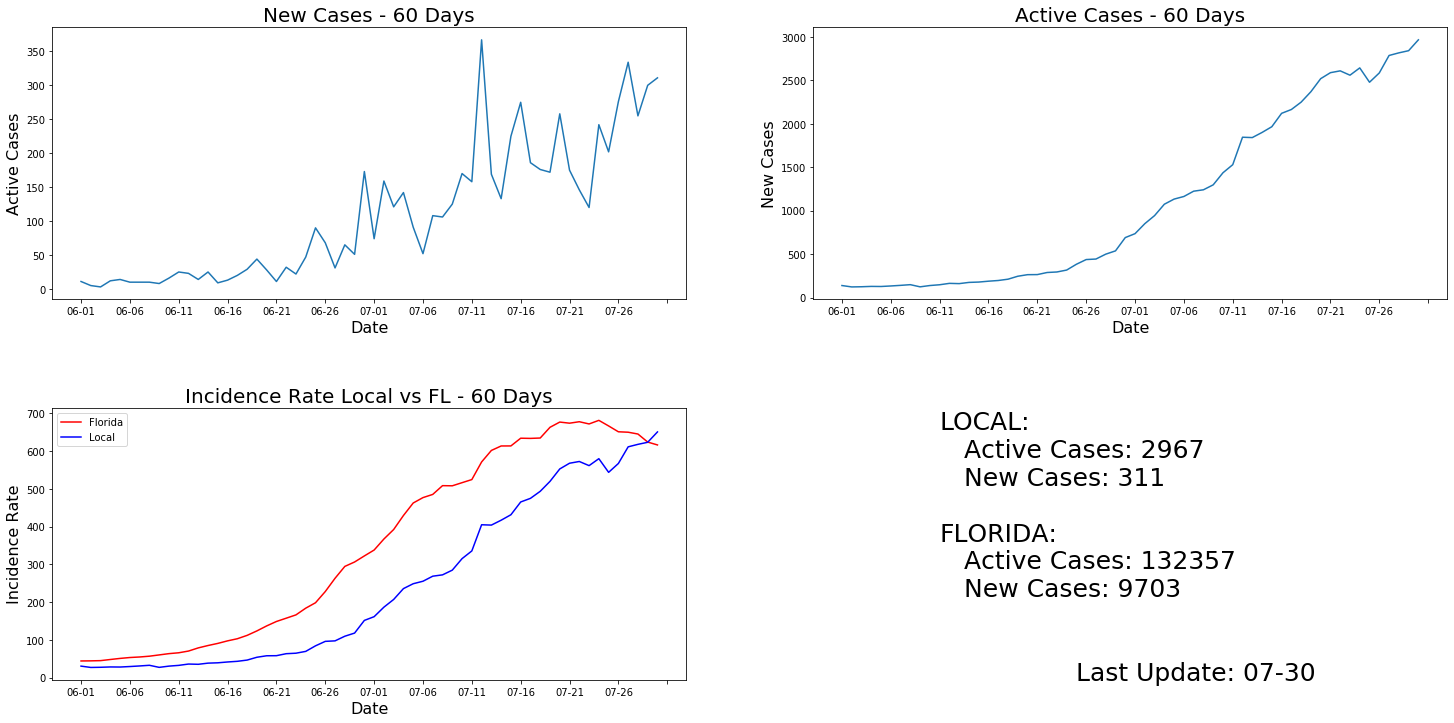

In [2]:
PlotDailyValue()

NameError: name 'Predictions' is not defined